In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

In [1]:
test_prompt_id = 1
data_path = f'outputs/DVRL_DomainAdaptation{test_prompt_id}_devsize0.01/'

# 価値推定のためのターゲットデータを用いてBERTを学習した結果

In [3]:
df_baseline = pd.read_csv(data_path + f'baseline_metrics{test_prompt_id}.csv')

In [4]:
df_baseline['qwk'].values[0]

0.5490969082654082

# 高価値データを使用して学習した結果(MLP, BERT, PAES)

In [5]:
df_MLP = pd.read_csv(data_path + 'mlp_qwk.csv', header=None)
df_BERT = pd.read_csv(data_path + 'bert_qwk.csv', header=None)
df_PAES = pd.read_csv(data_path + 'PAES_qwk.csv', header=None)

In [6]:
PAES_qwk = {
    1: 0.748,
    2: 0.596,
    3: 0.592,
    4: 0.632,
    5: 0.727,
    6: 0.613,
    7: 0.724,
    8: 0.552
}

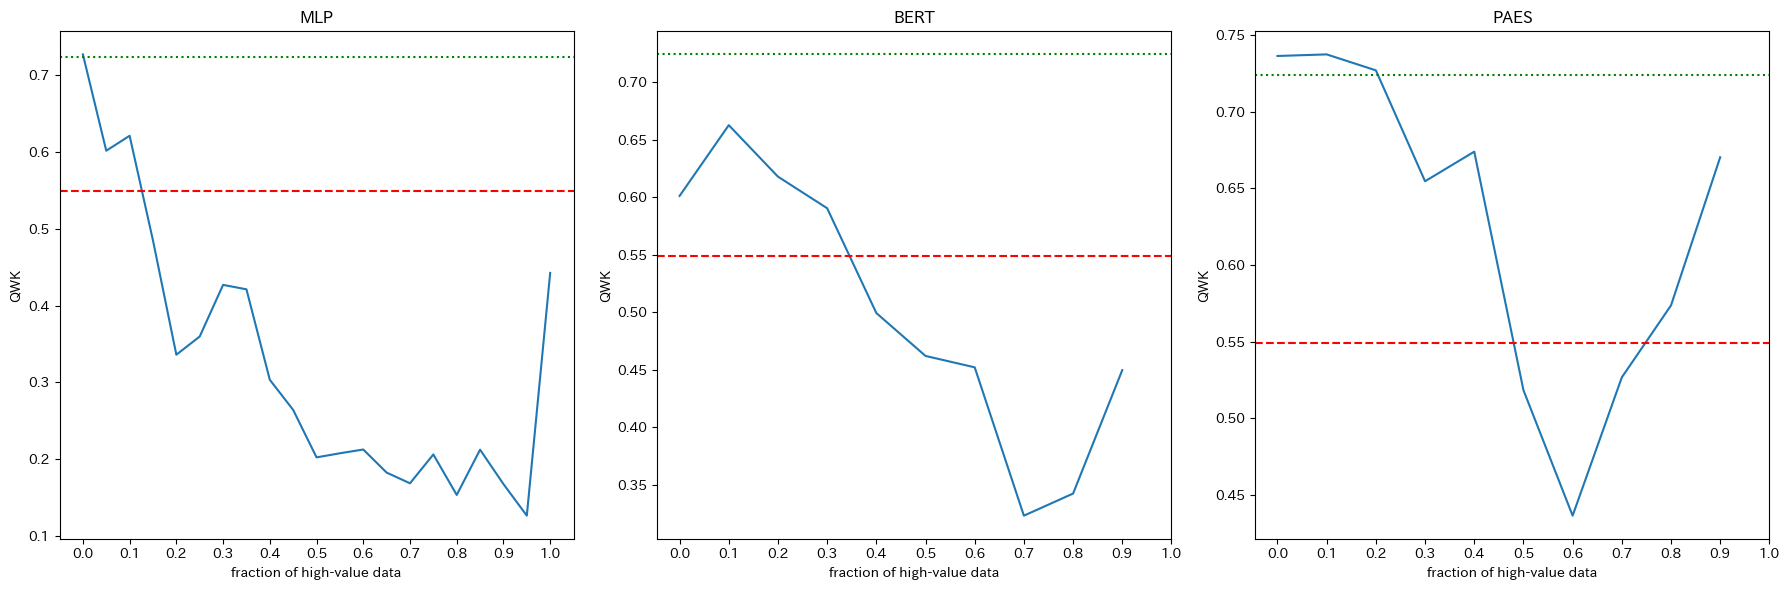

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Plot for MLP
sns.lineplot(data=df_MLP.T, x=0, y=1, ax=axs[0])
axs[0].axhline(y=df_baseline['qwk'].values[0], color='r', linestyle='--', label='baseline')
axs[0].axhline(y=PAES_qwk[test_prompt_id], color='g', linestyle=':', label='PAES_baseline')
axs[0].set_xlabel('fraction of high-value data')
axs[0].set_xticks(np.arange(0, 1.1, 0.1))
axs[0].set_ylabel('QWK')
axs[0].set_title('MLP')

# Placeholder for BERT
sns.lineplot(data=df_BERT.T, x=0, y=1, ax=axs[1])
axs[1].axhline(y=df_baseline['qwk'].values[0], color='r', linestyle='--')
axs[1].axhline(y=PAES_qwk[test_prompt_id], color='g', linestyle=':')
axs[1].set_xlabel('fraction of high-value data')
axs[1].set_xticks(np.arange(0, 1.1, 0.1))
axs[1].set_ylabel('QWK')
axs[1].set_title('BERT')

# Placeholder for PAES
sns.lineplot(data=df_PAES.T, x=0, y=1, ax=axs[2])
axs[2].axhline(y=df_baseline['qwk'].values[0], color='r', linestyle='--')
axs[2].axhline(y=PAES_qwk[test_prompt_id], color='g', linestyle=':')
axs[2].set_xlabel('fraction of high-value data')
axs[2].set_xticks(np.arange(0, 1.1, 0.1))
axs[2].set_ylabel('QWK')
axs[2].set_title('PAES')

plt.tight_layout()
plt.show()

# プロンプトごとの使用率

In [47]:
# 仮
test_prompt_id = 4
data_path = f'outputs/DVRL_DomainAdaptation{test_prompt_id}_devsize0.01/'

In [48]:
with open(data_path + 'prompt_values/prompt_value0.8.pkl', 'rb') as f:
    prompt_values = pickle.load(f)

<BarContainer object of 8 artists>

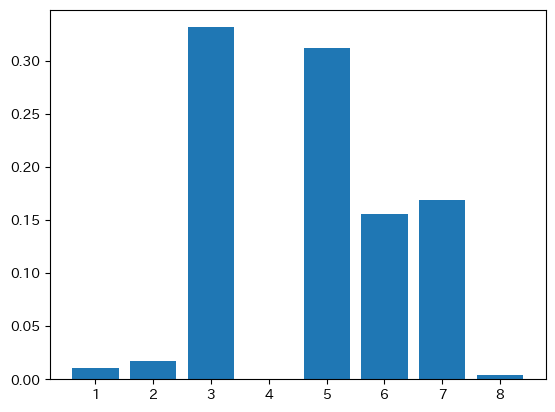

In [49]:
plt.bar(range(1, 9), prompt_values.values())